In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

                                   Task-1: Data Exploration and Preprocessing

Step-1: Analyze for Trends

We have found the key insights i.e. trends from the data:

Top cities / neighborhoods with most listings

Most common room types, property types, bed types

Distribution of log_price (target variable)

Correlation heatmap to check numerical feature relationships with log_price                                   

In [2]:
df=pd.read_csv("Airbnb_data - airbnb_data.csv")  #reading the csv file
df.head()   #displaying the top 5 records

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
#Basic Overview of dataset

df.info()            

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


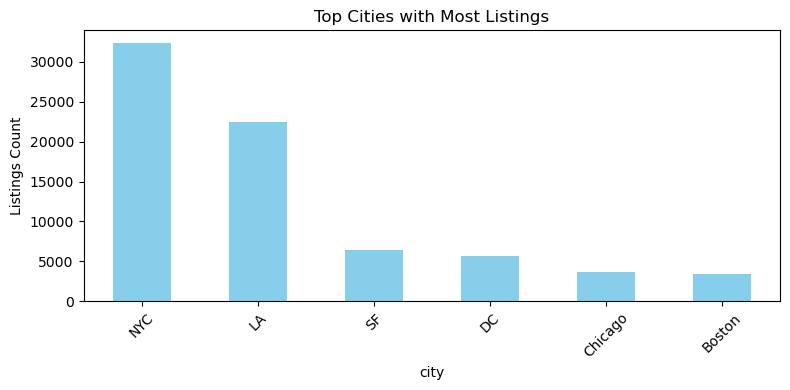

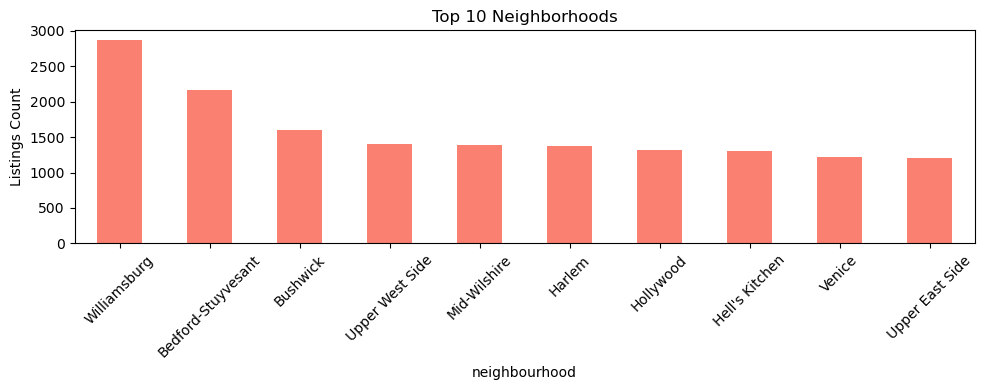

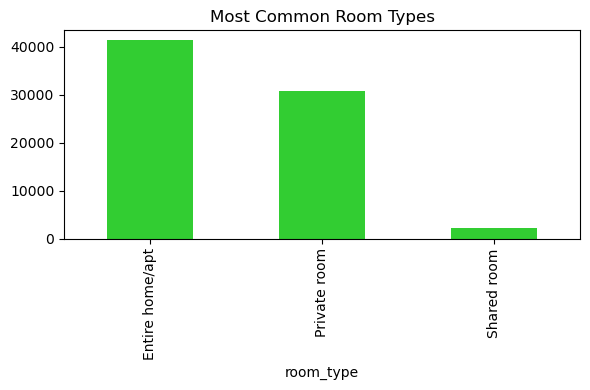

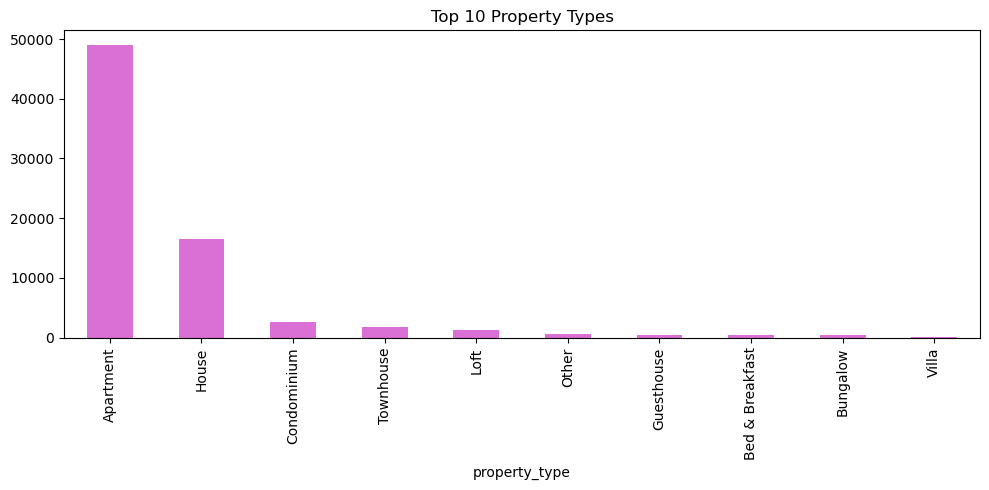

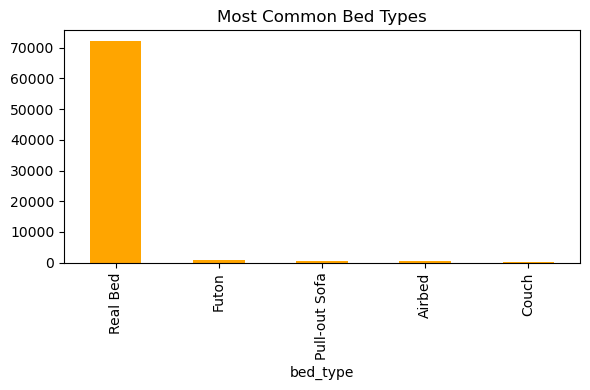

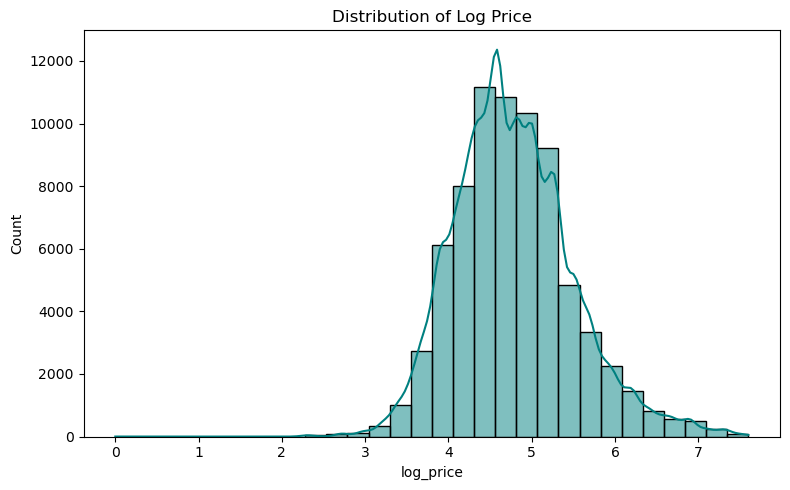

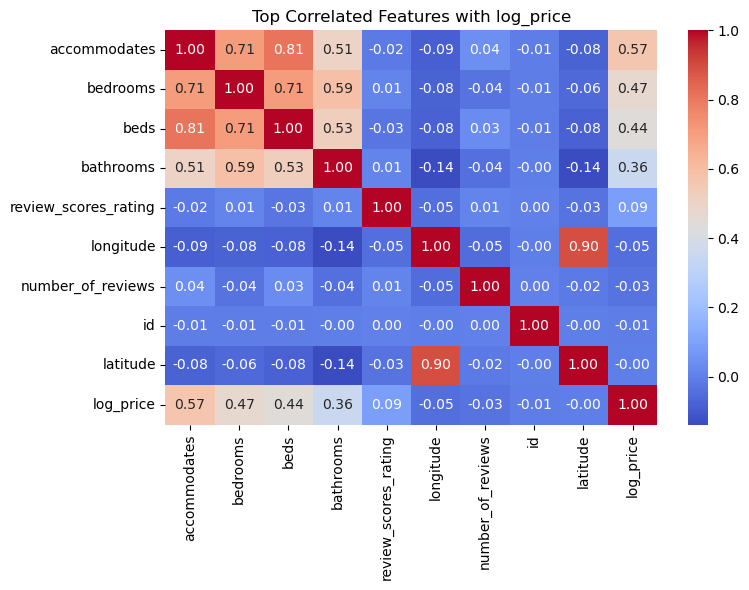

In [4]:
#Visualisation of data 


# 1. Top Cities

plt.figure(figsize=(8, 4))
df['city'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Cities with Most Listings")
plt.ylabel("Listings Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Neighborhoods

plt.figure(figsize=(10, 4))
df['neighbourhood'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Neighborhoods")
plt.ylabel("Listings Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Room Types

plt.figure(figsize=(6, 4))
df['room_type'].value_counts().plot(kind='bar', color='limegreen')
plt.title("Most Common Room Types")
plt.tight_layout()
plt.show()

# 4. Property Types

plt.figure(figsize=(10, 5))
df['property_type'].value_counts().head(10).plot(kind='bar', color='orchid')
plt.title("Top 10 Property Types")
plt.tight_layout()
plt.show()

# 5. Bed Types

plt.figure(figsize=(6, 4))
df['bed_type'].value_counts().plot(kind='bar', color='orange')
plt.title("Most Common Bed Types")
plt.tight_layout()
plt.show()

# 6. log_price Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], kde=True, bins=30, color='teal')
plt.title("Distribution of Log Price")
plt.xlabel("log_price")
plt.tight_layout()
plt.show()

# 7. Correlation Heatmap

numerical = df.select_dtypes(include='number')
corr = numerical.corr()
top_corr = corr['log_price'].drop('log_price').abs().sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(numerical[top_corr + ['log_price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with log_price")
plt.tight_layout()
plt.show()

(B) Checking for missing values in the dataset.

In [5]:


df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

(C) Checking for outliers in the dataset using box-plot method

<Figure size 1600x400 with 0 Axes>

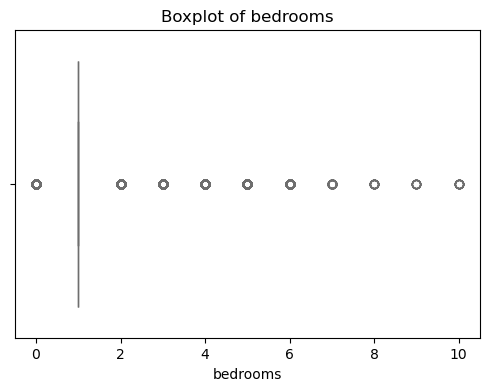

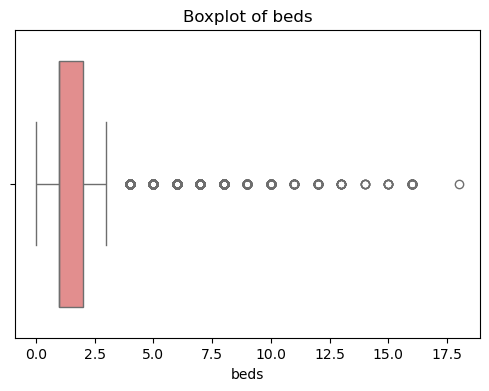

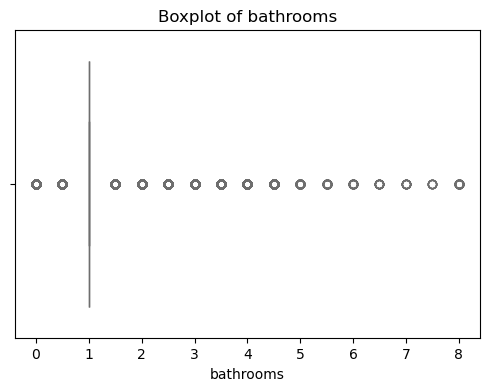

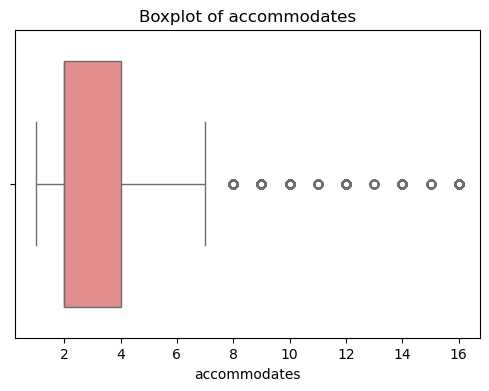

In [6]:
cols = ['bedrooms', 'beds', 'bathrooms', 'accommodates']

# Set up the plot canvas with 1 row and 4 columns
plt.figure(figsize=(16, 4))

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()

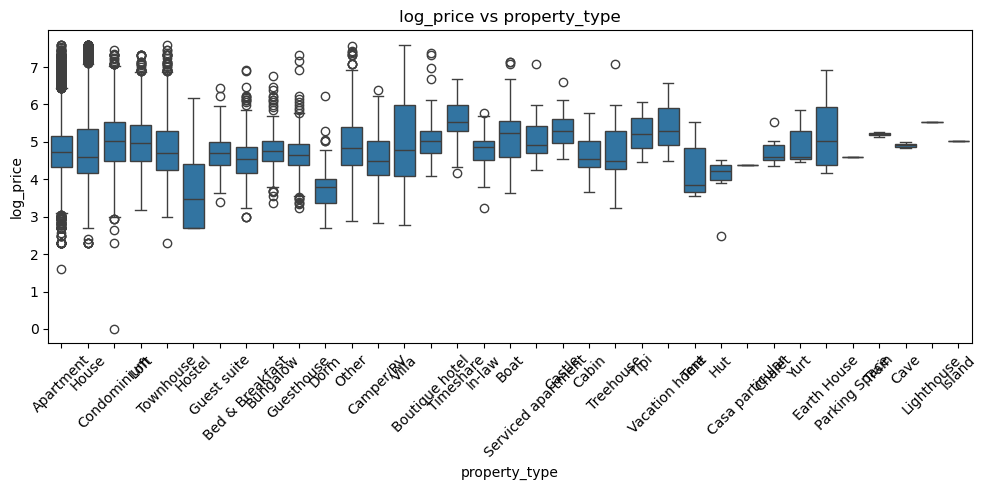

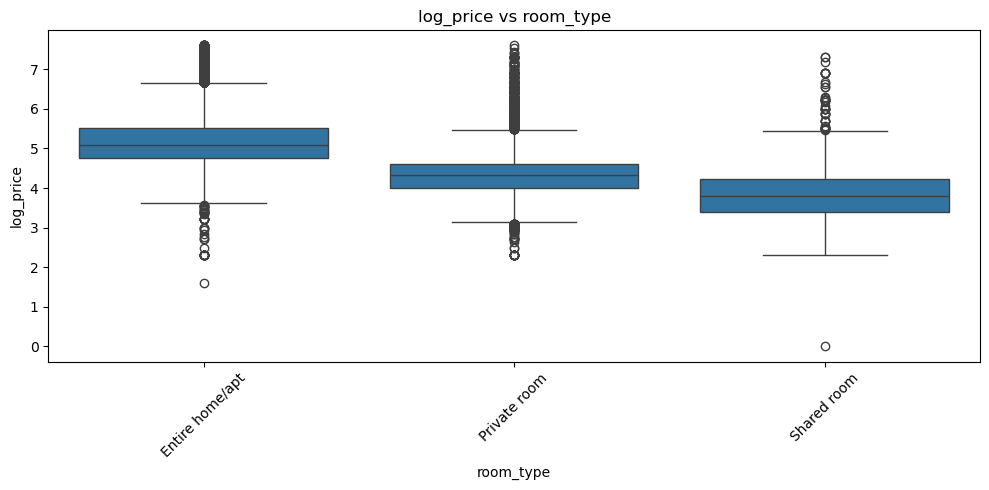

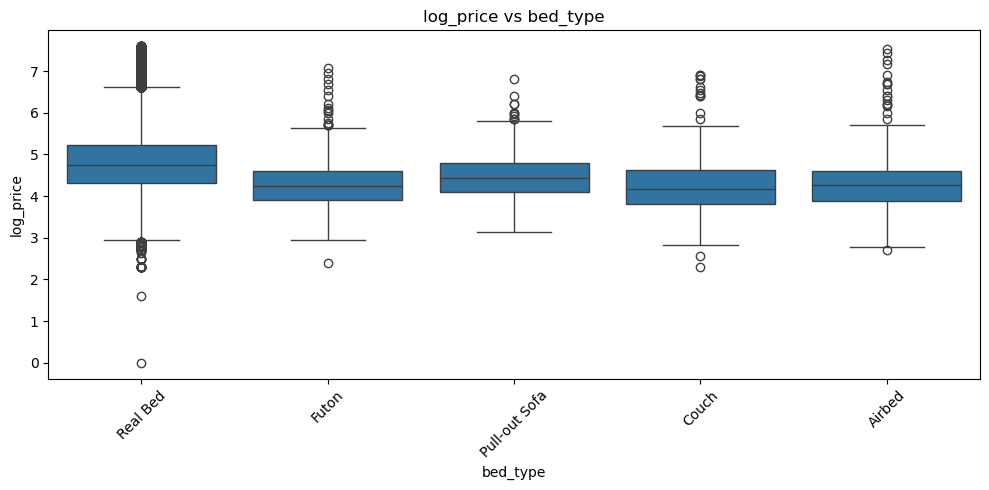

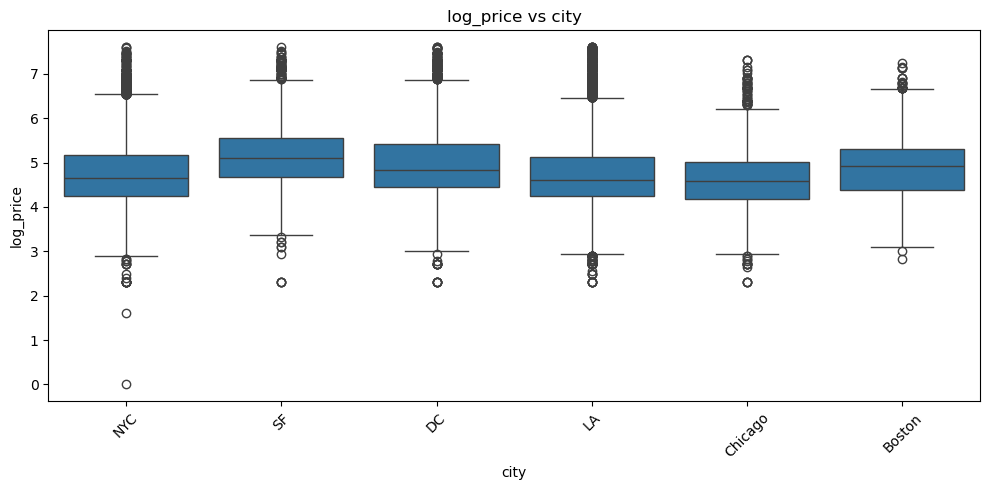

In [7]:
# List of categorical variables to visualize against log_price
categorical_cols = ['property_type', 'room_type', 'bed_type', 'city']

# Loop through each column and create boxplots
for col in categorical_cols:
    plt.figure(figsize=(10, 5))  # Adjust size as needed
    sns.boxplot(data=df, x=col, y='log_price')
    plt.title(f"log_price vs {col}")
    plt.xlabel(col)
    plt.ylabel("log_price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Step 2: Data Cleaning Process

In [8]:
# 1.Impute numeric columns with median

df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

# 2.Fill categorical columns with mode

df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)

# 3.Fill the neighborhood column having missing values with "Unknown"

df['neighbourhood'].fillna("Unknown", inplace=True)


# 4.Dropping columns that aren’t useful for ML

df.drop(['first_review', 'last_review'], axis=1, inplace=True)
df.drop(['host_response_rate', 'host_since', 'thumbnail_url', 'zipcode'], axis=1, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_25440\2268902247.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25440\2268902247.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [9]:
#Displaying the result after cleaning the dataset

df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [10]:
#Dropping the duplicates as well

df.drop_duplicates(inplace=True)

(B). Feature Engineering and Transformation

In [11]:
# Number of amenities that is to be used in ML model numerically

df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))


# Dropping non-useful column

df.drop(['description', 'name', 'id', 'amenities'], axis=1, inplace=True)




In [12]:
# List of categorical columns

categorical_cols = ['property_type', 'room_type', 'bed_type', 'city', 'neighbourhood']

#Group rare categories into 'Other' (for stability)

def group_rare_categories(df, col, min_count=500):
    freq = df[col].value_counts()
    common = freq[freq >= min_count].index
    df[col] = df[col].apply(lambda x: x if x in common else 'Other')
    return df

## Apply grouping to all categorical columns (only if needed)

for col in categorical_cols:
    df = group_rare_categories(df, col)


In [13]:
# One-Hot Encoding the categorical columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
#One-Hot Encoding for "Cancellation Column"

df = pd.get_dummies(df, columns=['cancellation_policy'], drop_first=True)


In [15]:
# Converting all boolean columns to 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [16]:
#Displaying the result

df.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,...,neighbourhood_Upper West Side,neighbourhood_Venice,neighbourhood_Washington Heights,neighbourhood_West Hollywood,neighbourhood_West Village,neighbourhood_Williamsburg,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,5.010635,3,1.0,1,t,t,f,40.696524,-73.991617,2,...,0,0,0,0,0,0,0,1,0,0
1,5.129899,7,1.0,1,t,f,t,40.766115,-73.989040,6,...,0,0,0,0,0,0,0,1,0,0
2,4.976734,5,1.0,1,t,t,t,40.808110,-73.943756,10,...,0,0,0,0,0,0,1,0,0,0
3,6.620073,4,1.0,1,t,t,f,37.772004,-122.431619,0,...,0,0,0,0,0,0,0,0,0,0
4,4.744932,2,1.0,1,t,t,t,38.925627,-77.034596,4,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#Fixing the columns to convert them boolean then to 0/1

for col in ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']:
    print(f"{col}: {df[col].unique()}")


host_has_profile_pic: ['t' 'f']
host_identity_verified: ['t' 'f']
instant_bookable: ['f' 't']


In [18]:
for col in ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']:
    df[col] = df[col].map({'t': True, 'f': False})


In [19]:
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']

for col in bool_cols:
    df[col] = df[col].astype(int)


In [20]:
#Displaying the result

df.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,...,neighbourhood_Upper West Side,neighbourhood_Venice,neighbourhood_Washington Heights,neighbourhood_West Hollywood,neighbourhood_West Village,neighbourhood_Williamsburg,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,5.010635,3,1.0,1,1,1,0,40.696524,-73.991617,2,...,0,0,0,0,0,0,0,1,0,0
1,5.129899,7,1.0,1,1,0,1,40.766115,-73.989040,6,...,0,0,0,0,0,0,0,1,0,0
2,4.976734,5,1.0,1,1,1,1,40.808110,-73.943756,10,...,0,0,0,0,0,0,1,0,0,0
3,6.620073,4,1.0,1,1,1,0,37.772004,-122.431619,0,...,0,0,0,0,0,0,0,0,0,0
4,4.744932,2,1.0,1,1,1,1,38.925627,-77.034596,4,...,0,0,0,0,0,0,1,0,0,0


                                        Task-2: Model Development 

We will split the data into training and test then perform multiple Machine Learning Algorithm on the model via training them to get best model for future prediction.
Below are the ML algorithm that we performed on the model

1. Linear Regression
2. KNN Regression
3. Random Forest
4. Support Vector Machine(SVR)
5. Decision Tree
6. XgBoost

In [21]:
# Features and target
X = df.drop(columns=['log_price'])  # Features
y = df['log_price']                 # Target variable


In [22]:
#Train-Test Split of the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


1. Training a Regression Model (Linear Regression)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Define and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred_lr = lr_model.predict(X_test)

# 3. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

# 4. Print results
print("  Linear Regression Evaluation:")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared (R²): {r2:.3f}")


  Linear Regression Evaluation:
 Root Mean Squared Error (RMSE): 0.45
 R-squared (R²): 0.605


2. Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


# Print results
print("Random Forest Evaluation:")
print(f" Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f" Random Forest MAE: {mae_rf:.3f}")
print(f" R-squared (R²): {r2_rf:.3f}")


Random Forest Evaluation:
 Root Mean Squared Error (RMSE): 0.39
 Random Forest MAE: 0.283
 R-squared (R²): 0.699


2(a). Hyper Parameter Tuning of Random Forest model to get more accuracy using RandomizedSearchCV method

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Define a lighter parameter grid for quick tuning
param_dist = {
    'n_estimators': [30, 50],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# 2. Initialize the model with max_samples to reduce training time
rf = RandomForestRegressor(
    random_state=42,
    max_samples=0.5  # Use 50% of data per tree (faster training)
)

# 3. Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,         # Try 5 random combinations only
    cv=3,             # 3-fold cross-validation
    n_jobs=-1,        # Use all CPU cores
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42
)

# 4. Fit the model
random_search.fit(X_train, y_train)

# 5. Get best model and predict
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# 6. Evaluate on test set
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)


# 7. Print results
print("Best Parameters:", random_search.best_params_)
print(f" Tuned Random Forest RMSE: {rmse_best:.2f}")
print(f" Tuned Random Forest R²: {r2_best:.3f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
 Tuned Random Forest RMSE: 0.41
 Tuned Random Forest R²: 0.678


3. Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree:\n   RMSE = {rmse_dt:.2f} | R² = {r2_dt:.3f} | MAE= {mae_dt:.3f}")

Decision Tree:
   RMSE = 0.55 | R² = 0.402 | MAE= 0.397


4. SVM(Support Vector Machine) with Feature Scaling.

In [28]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Scale the Features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize and train the SVR model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svm_model.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# 4. Evaluate



In [29]:
# 4. Evaluate
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)


# 5. Output Results
print(" SVM Regressor with Feature Scaling:")
print(f" RMSE: {rmse_svm:.2f}")
print(f" R² Score: {r2_svm:.3f}")
print(f" MAE: {mae_svm:.3f}")

 SVM Regressor with Feature Scaling:
 RMSE: 0.43
 R² Score: 0.637
 MAE: 0.314


5. KNN Regressor with feature Scaling

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize and train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this later
knn_model.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# 4. Evaluate
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)


# 5. Output results
print("KNN Regressor with Feature Scaling:")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.3f}")
print(f"MAE: {mae_knn:.3f}")


KNN Regressor with Feature Scaling:
RMSE: 0.48
R² Score: 0.557
MAE: 0.352


6. XGBoost Regressor

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Initialize and train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# 2. Predict
y_pred_xgb = xgb_model.predict(X_test)

# 3. Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# 4. Output Results
print(" XGBoost Regressor:")
print(f" RMSE: {rmse_xgb:.2f}")
print(f" R² Score: {r2_xgb:.3f}")


 XGBoost Regressor:
 RMSE: 0.39
 R² Score: 0.702


6(a). Hyper-Parameter Tuning of XgBoost model to enhance accuracy using RandomizedSearchCV method.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# 1. Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

# 2. Create base model
xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# 3. Random Search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42
)

# 4. Fit on training data
random_search.fit(X_train, y_train)

# 5. Best model
best_xgb = random_search.best_estimator_

# 6. Predict and evaluate
y_pred_xgb_tuned = best_xgb.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
r2_tuned = r2_score(y_test, y_pred_xgb_tuned)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_tuned)


print("Tuned XGBoost Results:")
print("Best Params:", random_search.best_params_)
print(f" RMSE: {rmse_tuned:.2f}")
print(f" R² Score: {r2_tuned:.3f}")
print(f" XGBoost (Tuned) MAE: {mae_xgb:.3f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Tuned XGBoost Results:
Best Params: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
 RMSE: 0.38
 R² Score: 0.717
 XGBoost (Tuned) MAE: 0.276


                                       Task-3: Model Evaluation

We have evaluated the models accuracy by using various algorithms

Below is the list of all models evaluation metrices


In [33]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Calculate metrics
model_results = {
    "Linear Regression": {
        "R²": r2_score(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        "MAE": mean_absolute_error(y_test, y_pred_lr)
    },
    "Random Forest": {
        "R²": r2_score(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "MAE": mean_absolute_error(y_test, y_pred_rf)
    },
    "Decision Tree": {
        "R²": r2_score(y_test, y_pred_dt),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        "MAE": mean_absolute_error(y_test, y_pred_dt)
    },
    "KNN Regressor": {
        "R²": r2_score(y_test, y_pred_knn),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        "MAE": mean_absolute_error(y_test, y_pred_knn)
    },
    "SVM Regressor": {
        "R²": r2_score(y_test, y_pred_svm),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svm)),
        "MAE": mean_absolute_error(y_test, y_pred_svm)
    },
    "XGBoost (Tuned)": {
        "R²": r2_score(y_test, y_pred_xgb_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)),
        "MAE": mean_absolute_error(y_test, y_pred_xgb_tuned)
    }
}

# Create and display DataFrame
results_df = pd.DataFrame(model_results).T.round(3)
results_df = results_df.sort_values(by="R²", ascending=False)

print("Final Model Evaluation Summary:")
print(results_df)


Final Model Evaluation Summary:
                      R²   RMSE    MAE
XGBoost (Tuned)    0.717  0.381  0.276
Random Forest      0.699  0.393  0.283
SVM Regressor      0.637  0.432  0.314
Linear Regression  0.605  0.450  0.333
KNN Regressor      0.557  0.477  0.352
Decision Tree      0.402  0.554  0.397


So far after analysing and evaluating all models metrices we have concluded that

XGBoost model with Hyper-Parameter Tuning is giving maximum accuracy of around 72%
considering the capacity of my system's CPU this is the best accuracy it could take 

So for future prediction of price we can use XGBoost Tuned model.

As Machine Learning Model have limitation while predicting accuracy with real and heavy dataset like this and to enhance
accuracy more we have to use Deep Learning techniques.

Top Insights Influencing Airbnb Prices
Room Type is a Major Price Driver

Entire homes/apartments command significantly higher prices than private or shared rooms.

Location Heavily Influences Pricing

Listings in central or tourist-frequented areas are priced higher; geographic coordinates proved to be strong predictors.

Host Trust & Booking Convenience Matter

Verified hosts and instant bookable listings tend to have higher prices, indicating guest preference for reliability and ease.

Property Features Add Value

More bedrooms/bathrooms, presence of a cleaning fee, and unique property types (e.g., lofts, villas) are associated with higher prices.